In [631]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import xgboost as xgb
from sklearn.feature_selection import RFECV

In [632]:
df = pd.read_csv('df.csv')

In [633]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4366 entries, 0 to 4365
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   game_id                     4366 non-null   int64  
 1   Date                        4366 non-null   object 
 2   Team                        4366 non-null   object 
 3   Opponent                    4366 non-null   object 
 4   club_id                     4366 non-null   int64  
 5   opponent_id                 4366 non-null   int64  
 6   own_manager_name            4366 non-null   object 
 7   opponent_manager_name       4366 non-null   object 
 8   Referee                     4366 non-null   object 
 9   TY                          4366 non-null   int64  
 10  OY                          4366 non-null   int64  
 11  TR                          4366 non-null   int64  
 12  OR                          4366 non-null   int64  
 13  B365TW                      4366 

In [634]:
not_app_features = ['game_id', 'club_id', 'opponent_id', 'B365TW', 'B365D', 'B365OW', 'Table', 'Oppo. Table', 
'own_manager_name', 'opponent_manager_name', 'Venue', 'Result', 'Referee', 'total_games', 'wins', 'win_percentage', 
'total_games_vs_opponent', 'wins_vs_opponent', 'win_percentage_vs_opponent']

In [635]:
app_features = ['Date', 'club_id', 'TY', 'OY', 'TR', 'OR', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA',
'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
'Expected Goals', 'Save%', 'Clean Sheet', 'Pass Completion %',
'Assists', 'Exp. Assisted Goals', 'Expected Assists', 'Tackles Won',
'% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error', 'market_value_in_eur']

In [636]:
# 'game_id', 'Date', 'club_id' index 빼고 모델링 할 컬럼의 리스트

selected_col = ['TY', 'OY', 'TR', 'OR', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA',
'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
'Expected Goals', 'Save%', 'Clean Sheet', 'Pass Completion %',
'Assists', 'Exp. Assisted Goals', 'Expected Assists', 'Tackles Won',
'% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error', 'market_value_in_eur']

In [637]:
moving_avg_df = df[app_features].groupby('club_id')[selected_col].rolling(window=5).mean().shift(1).reset_index(drop=True)

In [638]:
moving_avg_df

TY   OY   TR   OR  Possesion  Aerial Duels(%)   GF   GA  \
0     NaN  NaN  NaN  NaN        NaN              NaN  NaN  NaN   
1     NaN  NaN  NaN  NaN        NaN              NaN  NaN  NaN   
2     NaN  NaN  NaN  NaN        NaN              NaN  NaN  NaN   
3     NaN  NaN  NaN  NaN        NaN              NaN  NaN  NaN   
4     NaN  NaN  NaN  NaN        NaN              NaN  NaN  NaN   
...   ...  ...  ...  ...        ...              ...  ...  ...   
4361  1.4  2.4  0.0  0.0       62.4            58.74  1.6  1.4   
4362  1.4  2.4  0.0  0.0       63.0            53.36  1.0  1.4   
4363  2.2  2.4  0.0  0.2       65.2            55.94  2.0  1.4   
4364  2.4  2.2  0.2  0.2       63.6            54.14  2.2  1.6   
4365  2.4  2.0  0.2  0.2       65.8            55.86  2.2  1.4   

      Shot on Target  Shot on Target(%)  ...  Pass Completion %  Assists  \
0                NaN                NaN  ...                NaN      NaN   
1                NaN                NaN  ...                NaN      NaN   
2                NaN                NaN  ...                NaN      NaN   
3                NaN                NaN  ...                NaN      NaN   
4                NaN                NaN  ...                NaN      NaN   
...              ...                ...  ...                ...      ...   
4361             5.2              37.18  ...              86.10      1.2   
4362             4.2              34.42  ...              85.84      0.8   
4363             4.4              34.64  ...              85.78      1.2   
4364             5.2              35.26  ...              85.64      1.4   
4365             5.8              37.48  ...              87.62      1.4   

      Exp. Assisted Goals  Expected Assists  Tackles Won  \
0                     NaN               NaN          NaN   
1                     NaN               NaN          NaN   
2                     NaN               NaN          NaN   
3                     NaN               NaN          NaN   
4                     NaN               NaN          NaN   
...                   ...               ...          ...   
4361                 1.20              1.20         11.2   
4362                 1.06              1.10         10.8   
4363                 1.02              1.18         11.6   
4364                 1.04              1.04         11.2   
4365                 1.18              1.22         11.0   

      % of Dribblers Tackled  Blocks  Interceptions  Error  \
0                        NaN     NaN            NaN    NaN   
1                        NaN     NaN            NaN    NaN   
2                        NaN     NaN            NaN    NaN   
3                        NaN     NaN            NaN    NaN   
4                        NaN     NaN            NaN    NaN   
...                      ...     ...            ...    ...   
4361                   45.20    10.8            8.8    1.0   
4362                   45.94    11.6            8.8    0.8   
4363                   44.46    12.2            8.0    0.8   
4364                   41.96    12.0            7.4    0.8   
4365                   46.90    11.6            8.0    1.0   

      market_value_in_eur  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  
...                   ...  
4361         1.744524e+07  
4362         1.809482e+07  
4363         1.911625e+07  
4364         1.956208e+07  
4365         1.986208e+07  

[4366 rows x 24 columns]

In [639]:
m_final_df = pd.concat([df[not_app_features], moving_avg_df], axis=1)

In [640]:
m_final_df

game_id  club_id  opponent_id     B365TW      B365D     B365OW  Table  \
0     3050167       11          281  25.000000  26.315789  51.282051     15   
1     3050180       11          631  22.222222  25.000000  55.555556     17   
2     3050187       11          379  73.529412  18.181818  11.111111      9   
3     3050199       11          603  63.694268  23.094688  15.384615      9   
4     3050212       11          762  52.631579  26.315789  23.809524      7   
...       ...      ...          ...        ...        ...        ...    ...   
4361  4095317     1237          148  26.315789  23.809524  55.555556      9   
4362  4095328     1237          350  61.728395  23.809524  20.000000      7   
4363  4095333     1237           29  54.644809  26.315789  23.809524      7   
4364  4095343     1237          931  38.022814  27.777778  39.215686      9   
4365  4095353     1237          703  55.555556  25.000000  25.000000      8   

      Oppo. Table  own_manager_name opponent_manager_name  ...  \
0               3        Unai Emery         Pep Guardiola  ...   
1               3        Unai Emery        Maurizio Sarri  ...   
2              20        Unai Emery     Manuel Pellegrini  ...   
3              16        Unai Emery          Neil Warnock  ...   
4              19        Unai Emery        Rafael Benítez  ...   
...           ...               ...                   ...  ...   
4361            4  Roberto De Zerbi      Ange Postecoglou  ...   
4362           20  Roberto De Zerbi          Chris Wilder  ...   
4363           15  Roberto De Zerbi            Sean Dyche  ...   
4364           12  Roberto De Zerbi           Marco Silva  ...   
4365           17  Roberto De Zerbi   Nuno Espírito Santo  ...   

     Pass Completion % Assists Exp. Assisted Goals  Expected Assists  \
0                  NaN     NaN                 NaN               NaN   
1                  NaN     NaN                 NaN               NaN   
2                  NaN     NaN                 NaN               NaN   
3                  NaN     NaN                 NaN               NaN   
4                  NaN     NaN                 NaN               NaN   
...                ...     ...                 ...               ...   
4361             86.10     1.2                1.20              1.20   
4362             85.84     0.8                1.06              1.10   
4363             85.78     1.2                1.02              1.18   
4364             85.64     1.4                1.04              1.04   
4365             87.62     1.4                1.18              1.22   

      Tackles Won  % of Dribblers Tackled  Blocks  Interceptions  Error  \
0             NaN                     NaN     NaN            NaN    NaN   
1             NaN                     NaN     NaN            NaN    NaN   
2             NaN                     NaN     NaN            NaN    NaN   
3             NaN                     NaN     NaN            NaN    NaN   
4             NaN                     NaN     NaN            NaN    NaN   
...           ...                     ...     ...            ...    ...   
4361         11.2                   45.20    10.8            8.8    1.0   
4362         10.8                   45.94    11.6            8.8    0.8   
4363         11.6                   44.46    12.2            8.0    0.8   
4364         11.2                   41.96    12.0            7.4    0.8   
4365         11.0                   46.90    11.6            8.0    1.0   

      market_value_in_eur  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  
...                   ...  
4361         1.744524e+07  
4362         1.809482e+07  
4363         1.911625e+07  
4364         1.956208e+07  
4365         1.986208e+07  

[4366 rows x 43 columns]

In [641]:
cleaned_final_df = m_final_df.dropna()

In [642]:
cleaned_final_df

game_id  club_id  opponent_id     B365TW      B365D     B365OW  Table  \
5     3050217       11           29  69.444444  20.000000  13.333333      6   
6     3050227       11         1010  69.444444  19.607843  14.285714      5   
7     3050240       11          931  60.240964  23.094688  19.047619      4   
8     3050247       11         1003  65.359477  22.222222  15.384615      4   
9     3050259       11          873  57.142857  24.390244  21.052632      4   
...       ...      ...          ...        ...        ...        ...    ...   
4361  4095317     1237          148  26.315789  23.809524  55.555556      9   
4362  4095328     1237          350  61.728395  23.809524  20.000000      7   
4363  4095333     1237           29  54.644809  26.315789  23.809524      7   
4364  4095343     1237          931  38.022814  27.777778  39.215686      9   
4365  4095353     1237          703  55.555556  25.000000  25.000000      8   

      Oppo. Table  own_manager_name opponent_manager_name  ...  \
5              12        Unai Emery           Marco Silva  ...   
6               6        Unai Emery           Javi Gracia  ...   
7              17        Unai Emery     Slavisa Jokanovic  ...   
8              11        Unai Emery           Claude Puel  ...   
9              14        Unai Emery           Roy Hodgson  ...   
...           ...               ...                   ...  ...   
4361            4  Roberto De Zerbi      Ange Postecoglou  ...   
4362           20  Roberto De Zerbi          Chris Wilder  ...   
4363           15  Roberto De Zerbi            Sean Dyche  ...   
4364           12  Roberto De Zerbi           Marco Silva  ...   
4365           17  Roberto De Zerbi   Nuno Espírito Santo  ...   

     Pass Completion % Assists Exp. Assisted Goals  Expected Assists  \
5                81.36     1.2                1.26              1.10   
6                82.24     1.6                1.30              1.20   
7                81.96     1.6                1.04              1.08   
8                81.30     2.2                0.86              0.96   
9                81.62     2.2                1.12              1.36   
...                ...     ...                 ...               ...   
4361             86.10     1.2                1.20              1.20   
4362             85.84     0.8                1.06              1.10   
4363             85.78     1.2                1.02              1.18   
4364             85.64     1.4                1.04              1.04   
4365             87.62     1.4                1.18              1.22   

      Tackles Won  % of Dribblers Tackled  Blocks  Interceptions  Error  \
5             9.2                   38.84    10.4            9.6    1.2   
6             8.8                   37.16    10.4            9.0    1.0   
7             8.6                   38.82    10.6            8.0    0.8   
8             9.2                   45.48    10.6            9.6    0.8   
9             9.6                   43.72    11.8            9.4    0.4   
...           ...                     ...     ...            ...    ...   
4361         11.2                   45.20    10.8            8.8    1.0   
4362         10.8                   45.94    11.6            8.8    0.8   
4363         11.6                   44.46    12.2            8.0    0.8   
4364         11.2                   41.96    12.0            7.4    0.8   
4365         11.0                   46.90    11.6            8.0    1.0   

      market_value_in_eur  
5            3.158571e+07  
6            3.164286e+07  
7            3.135714e+07  
8            3.141429e+07  
9            3.166429e+07  
...                   ...  
4361         1.744524e+07  
4362         1.809482e+07  
4363         1.911625e+07  
4364         1.956208e+07  
4365         1.986208e+07  

[4253 rows x 43 columns]

In [643]:
# 라벨 인코더 객체 생성
label_encoder = LabelEncoder()

# 라벨 인코딩 적용
cleaned_final_df['own_manager_name'] = label_encoder.fit_transform(cleaned_final_df['own_manager_name'])

C:\Users\parks\AppData\Local\Temp\ipykernel_23484\2946582812.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_final_df['own_manager_name'] = label_encoder.fit_transform(cleaned_final_df['own_manager_name'])


In [644]:
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
label_mapping

{'Aaron Danks': 0,
 'Adam Sadler': 1,
 'Albert Stuivenberg': 2,
 'Andoni Iraola': 3,
 'Ange Postecoglou': 4,
 'Antonio Conte': 5,
 'Björn Hamberg': 6,
 'Brendan Rodgers': 7,
 'Bruno Lage': 8,
 'Bruno Saltor': 9,
 'Carlo Ancelotti': 10,
 'Chris Hughton': 11,
 'Chris Wilder': 12,
 'Claude Puel': 13,
 'Claudio Ranieri': 14,
 'Cristian Stellini': 15,
 'Daniel Farke': 16,
 'David Moyes': 17,
 'David Wagner': 18,
 'Dean Smith': 19,
 'Duncan Ferguson': 20,
 'Eddie Howe': 21,
 'Erik ten Hag': 22,
 'Frank Lampard': 23,
 'Freddie Ljungberg': 24,
 "Gary O'Neil": 25,
 'Graeme Jones': 26,
 'Graham Potter': 27,
 'Hayden Mullins': 28,
 'Ian Woan': 29,
 'Jan Siewert': 30,
 'Jason Tindall': 31,
 'Javi Gracia': 32,
 'Jesse Marsch': 33,
 'José Mourinho': 34,
 'Julen Lopetegui': 35,
 'Jürgen Klopp': 36,
 'Kelvin Davis': 37,
 'Manuel Pellegrini': 38,
 'Marcelo Bielsa': 39,
 'Marco Silva': 40,
 'Mark Hudson': 41,
 'Mark Hughes': 42,
 'Mauricio Pochettino': 43,
 'Maurizio Sarri': 44,
 'Michael Carrick': 45,


In [645]:
# 라벨 인코더 객체 생성
label_encoder2 = LabelEncoder()

# 라벨 인코딩 적용
cleaned_final_df['opponent_manager_name'] = label_encoder2.fit_transform(cleaned_final_df['opponent_manager_name'])

C:\Users\parks\AppData\Local\Temp\ipykernel_23484\661755266.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_final_df['opponent_manager_name'] = label_encoder2.fit_transform(cleaned_final_df['opponent_manager_name'])


In [646]:
label_mapping2 = dict(zip(label_encoder2.classes_, range(len(label_encoder2.classes_))))
label_mapping2

{'Aaron Danks': 0,
 'Adam Sadler': 1,
 'Albert Stuivenberg': 2,
 'Andoni Iraola': 3,
 'Ange Postecoglou': 4,
 'Antonio Conte': 5,
 'Björn Hamberg': 6,
 'Brendan Rodgers': 7,
 'Bruno Lage': 8,
 'Bruno Saltor': 9,
 'Carlo Ancelotti': 10,
 'Chris Hughton': 11,
 'Chris Wilder': 12,
 'Claude Puel': 13,
 'Claudio Ranieri': 14,
 'Cristian Stellini': 15,
 'Daniel Farke': 16,
 'David Moyes': 17,
 'David Wagner': 18,
 'Dean Smith': 19,
 'Duncan Ferguson': 20,
 'Eddie Howe': 21,
 'Erik ten Hag': 22,
 'Frank Lampard': 23,
 'Freddie Ljungberg': 24,
 "Gary O'Neil": 25,
 'Graeme Jones': 26,
 'Graham Potter': 27,
 'Hayden Mullins': 28,
 'Ian Woan': 29,
 'Jan Siewert': 30,
 'Jason Tindall': 31,
 'Javi Gracia': 32,
 'Jesse Marsch': 33,
 'José Mourinho': 34,
 'Julen Lopetegui': 35,
 'Jürgen Klopp': 36,
 'Kelvin Davis': 37,
 'Manuel Pellegrini': 38,
 'Marcelo Bielsa': 39,
 'Marco Silva': 40,
 'Mark Hudson': 41,
 'Mark Hughes': 42,
 'Mauricio Pochettino': 43,
 'Maurizio Sarri': 44,
 'Michael Carrick': 45,


In [647]:
label_mapping == label_mapping2

True

In [648]:
cleaned_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4253 entries, 5 to 4365
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   game_id                     4253 non-null   int64  
 1   club_id                     4253 non-null   int64  
 2   opponent_id                 4253 non-null   int64  
 3   B365TW                      4253 non-null   float64
 4   B365D                       4253 non-null   float64
 5   B365OW                      4253 non-null   float64
 6   Table                       4253 non-null   int64  
 7   Oppo. Table                 4253 non-null   int64  
 8   own_manager_name            4253 non-null   int32  
 9   opponent_manager_name       4253 non-null   int32  
 10  Venue                       4253 non-null   object 
 11  Result                      4253 non-null   object 
 12  Referee                     4253 non-null   object 
 13  total_games                 4253 non-n

In [649]:
home_df = cleaned_final_df[cleaned_final_df['Venue'] == 'Home']

In [650]:
away_df = cleaned_final_df[cleaned_final_df['Venue'] == 'Away']

In [651]:
merged_df = pd.merge(home_df, away_df, on='game_id')

In [652]:
merged_df

game_id  club_id_x  opponent_id_x   B365TW_x    B365D_x   B365OW_x  \
0     3050217         11             29  69.444444  20.000000  13.333333   
1     3050227         11           1010  69.444444  19.607843  14.285714   
2     3050247         11           1003  65.359477  22.222222  15.384615   
3     3050267         11             31  25.641026  25.641026  51.282051   
4     3050277         11            543  60.240964  23.809524  19.047619   
...       ...        ...            ...        ...        ...        ...   
2105  4095259       1237            148  40.000000  27.777778  38.461538   
2106  4095279       1237            543  60.606061  23.094688  20.000000   
2107  4095299       1237            873  58.823529  25.000000  21.052632   
2108  4095333       1237             29  54.644809  26.315789  23.809524   
2109  4095353       1237            703  55.555556  25.000000  25.000000   

      Table_x  Oppo. Table_x  own_manager_name_x  opponent_manager_name_x  \
0           6             12                  82                       40   
1           5              6                  82                       32   
2           4             11                  82                       13   
3           5              3                  82                       36   
4           5             11                  82                       53   
...       ...            ...                 ...                      ...   
2105        8              5                  67                        4   
2106        7             11                  67                       25   
2107        8             14                  67                       68   
2108        7             15                  67                       73   
2109        8             17                  67                       53   

      ... Pass Completion %_y Assists_y Exp. Assisted Goals_y  \
0     ...               75.60       1.6                  0.94   
1     ...               65.84       1.6                  0.70   
2     ...               77.28       1.2                  1.02   
3     ...               82.88       1.0                  0.86   
4     ...               76.66       0.6                  0.98   
...   ...                 ...       ...                   ...   
2105  ...               85.54       1.8                  1.52   
2106  ...               76.42       1.4                  1.02   
2107  ...               77.50       1.4                  0.86   
2108  ...               70.26       0.4                  1.22   
2109  ...               74.82       1.2                  1.48   

      Expected Assists_y  Tackles Won_y  % of Dribblers Tackled_y  Blocks_y  \
0                   0.92           12.4                     48.92      11.0   
1                   0.70           12.4                     57.42      10.8   
2                   1.00           13.0                     48.82      12.4   
3                   1.00            9.2                     54.10      10.6   
4                   0.74            9.6                     45.72      12.4   
...                  ...            ...                       ...       ...   
2105                1.34           13.4                     61.40      12.4   
2106                0.84           11.2                     47.76      13.0   
2107                0.82           12.4                     60.92      13.4   
2108                0.68           14.6                     56.82      13.0   
2109                0.80           11.4                     60.64      15.0   

      Interceptions_y  Error_y  market_value_in_eur_y  
0                11.0      0.6           1.807857e+07  
1                16.0      0.2           7.131319e+06  
2                10.0      0.4           1.536264e+07  
3                 8.6      0.4           4.690769e+07  
4                13.4      0.2           1.222143e+07  
...               ...      ...                    ...  
2105              8.2      1.6           3.259

In [653]:
merged_df['Venue_x'] = merged_df['club_id_x']

In [654]:
merged_df =  merged_df.drop(['club_id_y', 'opponent_id_y', 'B365TW_y', 'B365D_y', 'B365OW_y', 'Table_y', 'Oppo. Table_y', 
                'own_manager_name_y', 'opponent_manager_name_y', 'Referee_y', 'Venue_y', 'Result_y'], axis=1)

In [655]:
merged_df = merged_df.rename(columns={'opponent_id_x': 'club_id_y', 'B365TW_x': 'B365HW', 'B365D_x': 'B365D',
                                     'B365OW_x': 'B365AW', 'Oppo. Table_x': 'Table_y', 'Referee_x':'Referee',
                                     'own_manager_name_x': 'manager_name_x', 'opponent_manager_name_x':'manager_name_y',
                                     'Result_x': 'Result', 'Venue_x':'home_team_id'})

In [656]:
def chage_result(row):
    if row == 'W':
        return 'XW'
    elif row == 'L':
        return 'YW'
    else :
        return 'D'

In [657]:
merged_df['Result'] = merged_df['Result'].apply(chage_result)

In [658]:
# 라벨 인코더 객체 생성
label_encoder3 = LabelEncoder()

# 라벨 인코딩 적용
merged_df['Referee'] = label_encoder3.fit_transform(merged_df['Referee'])

In [659]:
label_mapping3 = dict(zip(label_encoder3.classes_, range(len(label_encoder3.classes_))))
label_mapping3

{'A Madley': 0,
 'A Marriner': 1,
 'A Moss': 2,
 'A Taylor': 3,
 'C Kavanagh': 4,
 'C Pawson': 5,
 'C Salisbury': 6,
 'D Bond': 7,
 'D Coote': 8,
 'D England': 9,
 'G Scott': 10,
 'J Brooks': 11,
 'J Gillett': 12,
 'J Moss': 13,
 'J Smith': 14,
 'K Friend': 15,
 'L Mason': 16,
 'L Probert': 17,
 'L Smith': 18,
 'M Atkinson': 19,
 'M Dean': 20,
 'M Oliver': 21,
 'M Salisbury': 22,
 'O Langford': 23,
 'P Bankes': 24,
 'P Tierney': 25,
 'R East': 26,
 'R Jones': 27,
 'R Madley': 28,
 'R Welch': 29,
 'S Allison': 30,
 'S Attwell': 31,
 'S Barrott': 32,
 'S Hooper': 33,
 'S Scott': 34,
 'S Singh': 35,
 'T Bramall': 36,
 'T Harrington': 37,
 'T Robinson': 38}

In [660]:
# 라벨 인코더 객체 생성
label_encoder4 = LabelEncoder()

# 라벨 인코딩 적용
merged_df['Result'] = label_encoder4.fit_transform(merged_df['Result'])

In [661]:
label_mapping4 = dict(zip(label_encoder4.classes_, range(len(label_encoder4.classes_))))
label_mapping4

{'D': 0, 'XW': 1, 'YW': 2}

In [662]:
merged_df.columns

Index(['game_id', 'club_id_x', 'club_id_y', 'B365HW', 'B365D', 'B365AW',
       'Table_x', 'Table_y', 'manager_name_x', 'manager_name_y',
       'home_team_id', 'Result', 'Referee', 'total_games_x', 'wins_x',
       'win_percentage_x', 'total_games_vs_opponent_x', 'wins_vs_opponent_x',
       'win_percentage_vs_opponent_x', 'TY_x', 'OY_x', 'TR_x', 'OR_x',
       'Possesion_x', 'Aerial Duels(%)_x', 'GF_x', 'GA_x', 'Shot on Target_x',
       'Shot on Target(%)_x', 'Goals per Shot_x', 'Expected Goals_x',
       'Save%_x', 'Clean Sheet_x', 'Pass Completion %_x', 'Assists_x',
       'Exp. Assisted Goals_x', 'Expected Assists_x', 'Tackles Won_x',
       '% of Dribblers Tackled_x', 'Blocks_x', 'Interceptions_x', 'Error_x',
       'market_value_in_eur_x', 'total_games_y', 'wins_y', 'win_percentage_y',
       'total_games_vs_opponent_y', 'wins_vs_opponent_y',
       'win_percentage_vs_opponent_y', 'TY_y', 'OY_y', 'TR_y', 'OR_y',
       'Possesion_y', 'Aerial Duels(%)_y', 'GF_y', 'GA_y', 'Shot o

In [663]:
independent_variable = ['club_id_x', 'club_id_y', 'B365HW', 'B365D', 'B365AW',
       'Table_x', 'Table_y', 'manager_name_x', 'manager_name_y',
       'home_team_id', 'Referee', 'total_games_x', 'wins_x',
       'win_percentage_x', 'total_games_vs_opponent_x', 'wins_vs_opponent_x',
       'win_percentage_vs_opponent_x', 'TY_x', 'OY_x', 'TR_x', 'OR_x',
       'Possesion_x', 'Aerial Duels(%)_x', 'GF_x', 'GA_x', 'Shot on Target_x',
       'Shot on Target(%)_x', 'Goals per Shot_x', 'Expected Goals_x',
       'Save%_x', 'Clean Sheet_x', 'Pass Completion %_x', 'Assists_x',
       'Exp. Assisted Goals_x', 'Expected Assists_x', 'Tackles Won_x',
       '% of Dribblers Tackled_x', 'Blocks_x', 'Interceptions_x', 'Error_x',
       'market_value_in_eur_x', 'total_games_y', 'wins_y', 'win_percentage_y',
       'total_games_vs_opponent_y', 'wins_vs_opponent_y',
       'win_percentage_vs_opponent_y', 'TY_y', 'OY_y', 'TR_y', 'OR_y',
       'Possesion_y', 'Aerial Duels(%)_y', 'GF_y', 'GA_y', 'Shot on Target_y',
       'Shot on Target(%)_y', 'Goals per Shot_y', 'Expected Goals_y',
       'Save%_y', 'Clean Sheet_y', 'Pass Completion %_y', 'Assists_y',
       'Exp. Assisted Goals_y', 'Expected Assists_y', 'Tackles Won_y',
       '% of Dribblers Tackled_y', 'Blocks_y', 'Interceptions_y', 'Error_y',
       'market_value_in_eur_y']

In [664]:
# 데이터셋 train과 test로 나누기
X = merged_df[independent_variable]
y = merged_df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [665]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5521327014218009
F1 Score: 0.5010502395750356


In [666]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5521327014218009
F1 Score: 0.5010502395750356


In [667]:
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.54739336492891
F1 Score: 0.48742710986448295


In [668]:
rf_model = RandomForestClassifier(n_estimators=400, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5450236966824644
F1 Score: 0.48652944590158337


In [669]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5521327014218009
F1 Score: 0.49515387067315536


In [670]:
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.54739336492891
F1 Score: 0.5176645934731601


In [671]:
xgb_model = xgb.XGBClassifier(n_estimators=300, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5450236966824644
F1 Score: 0.5220770720052339


In [672]:
def get_3_hist(data:pd.DataFrame, columns:list):
    
    plt.figure(figsize=(15, 5 * (len(columns) // 3)))

    for i, col in enumerate(columns):
        plt.subplot(len(columns) // 3 + (len(columns) % 3 > 0), 3, i + 1)
        sns.histplot(data[col], kde=True)
        plt.title(col)

    # 전체 그림 표시
    plt.tight_layout()
    plt.show()

In [673]:
selected_col_for_remove = [
       'Possesion_x', 'Aerial Duels(%)_x', 'GF_x', 'GA_x', 'Shot on Target_x',
       'Shot on Target(%)_x', 'Goals per Shot_x', 'Expected Goals_x',
       'Save%_x', 'Clean Sheet_x', 'Pass Completion %_x', 'Assists_x',
       'Exp. Assisted Goals_x', 'Expected Assists_x', 'Tackles Won_x',
       '% of Dribblers Tackled_x', 'Blocks_x', 'Interceptions_x', 'Error_x',
       'market_value_in_eur_x', 'Possesion_y',
       'Aerial Duels(%)_y', 'GF_y', 'GA_y', 'Shot on Target_y',
       'Shot on Target(%)_y', 'Goals per Shot_y', 'Expected Goals_y',
       'Save%_y', 'Clean Sheet_y', 'Pass Completion %_y', 'Assists_y',
       'Exp. Assisted Goals_y', 'Expected Assists_y', 'Tackles Won_y',
       '% of Dribblers Tackled_y', 'Blocks_y', 'Interceptions_y', 'Error_y',
       'market_value_in_eur_y']

In [674]:
# z-score를 계산하여 이상치가 있는지 확인하고 이상치를 제외한 데이터 반환
def remove_outliers(df, threshold):
    z_scores = (df - df.mean()) / df.std()
    no_outliers_df = df[(z_scores <= threshold) & (z_scores >= -threshold)]
    return no_outliers_df

# 각 컬럼의 이상치 제거 전/후 히스토그램을 나란히 그리는 함수
def plot_histogram_with_outliers(df, threshold):
    num_columns = len(df.columns)
    fig, axs = plt.subplots(num_columns, 2, figsize=(10, 3*num_columns))  # 크기 조정
    
    # 이상치 제거한 횟수를 저장할 리스트
    outlier_removal_counts = []
    
    for i, col in enumerate(df.columns):
        # 이상치 제거 전 히스토그램
        axs[i, 0].hist(df[col], bins=20, color='blue', alpha=0.7)
        axs[i, 0].set_title(f'Histogram of {col} (Before Removing Outliers)')
        axs[i, 0].set_xlabel('Values')
        axs[i, 0].set_ylabel('Frequency')
        
        # 이상치 제거 후 히스토그램
        no_outliers_df = remove_outliers(df[col], threshold)
        axs[i, 1].hist(no_outliers_df, bins=20, color='green', alpha=0.7)
        axs[i, 1].set_title(f'Histogram of {col} (After Removing Outliers)')
        axs[i, 1].set_xlabel('Values')
        axs[i, 1].set_ylabel('Frequency')
        
        # 이상치 제거한 횟수 저장
        outlier_removal_counts.append(len(df) - len(no_outliers_df))

    # 이상치 제거한 횟수를 출력
    for i, col in enumerate(df.columns):
        print(f'Number of outliers removed in {col}: {outlier_removal_counts[i]}')

    plt.tight_layout()
    plt.show()

Number of outliers removed in Possesion_x: 0
Number of outliers removed in Aerial Duels(%)_x: 6
Number of outliers removed in GF_x: 13
Number of outliers removed in GA_x: 15
Number of outliers removed in Shot on Target_x: 12
Number of outliers removed in Shot on Target(%)_x: 6
Number of outliers removed in Goals per Shot_x: 16
Number of outliers removed in Expected Goals_x: 18
Number of outliers removed in Save%_x: 13
Number of outliers removed in Clean Sheet_x: 7
Number of outliers removed in Pass Completion %_x: 3
Number of outliers removed in Assists_x: 14
Number of outliers removed in Exp. Assisted Goals_x: 20
Number of outliers removed in Expected Assists_x: 21
Number of outliers removed in Tackles Won_x: 5
Number of outliers removed in % of Dribblers Tackled_x: 6
Number of outliers removed in Blocks_x: 7
Number of outliers removed in Interceptions_x: 9
Number of outliers removed in Error_x: 21
Number of outliers removed in market_value_in_eur_x: 8
Number of outliers removed in Po

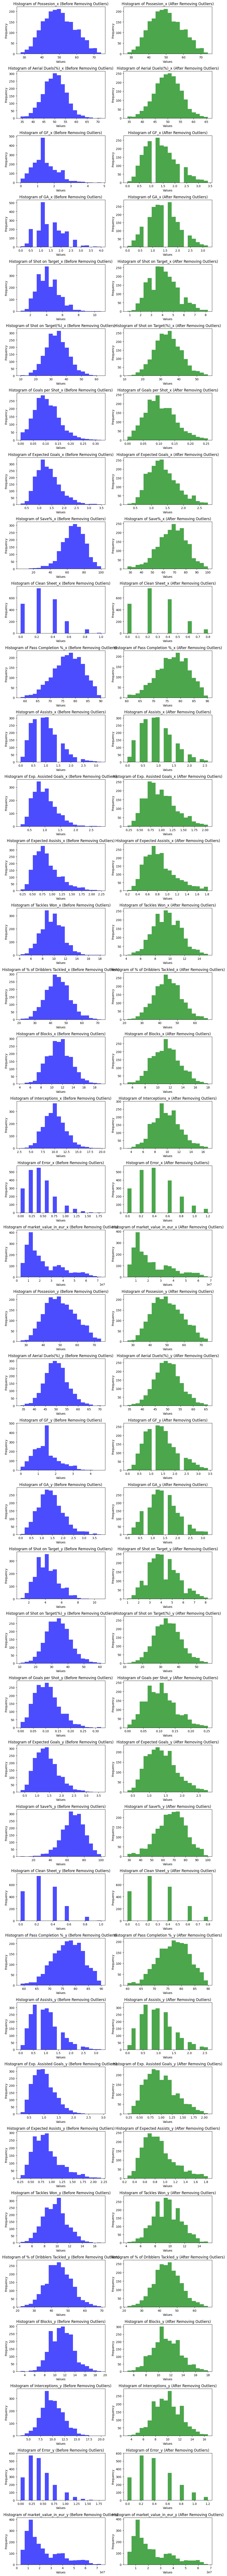

In [675]:
# 데이터프레임에서 이상치 제거 전/후 히스토그램 그리기 : threshold 3
plot_histogram_with_outliers(merged_df[selected_col_for_remove], 3)

Number of outliers removed in Possesion_x: 0
Number of outliers removed in Aerial Duels(%)_x: 1
Number of outliers removed in GF_x: 2
Number of outliers removed in GA_x: 2
Number of outliers removed in Shot on Target_x: 3
Number of outliers removed in Shot on Target(%)_x: 0
Number of outliers removed in Goals per Shot_x: 2
Number of outliers removed in Expected Goals_x: 2
Number of outliers removed in Save%_x: 1
Number of outliers removed in Clean Sheet_x: 0
Number of outliers removed in Pass Completion %_x: 0
Number of outliers removed in Assists_x: 2
Number of outliers removed in Exp. Assisted Goals_x: 8
Number of outliers removed in Expected Assists_x: 2
Number of outliers removed in Tackles Won_x: 1
Number of outliers removed in % of Dribblers Tackled_x: 0
Number of outliers removed in Blocks_x: 0
Number of outliers removed in Interceptions_x: 1
Number of outliers removed in Error_x: 1
Number of outliers removed in market_value_in_eur_x: 0
Number of outliers removed in Possesion_y:

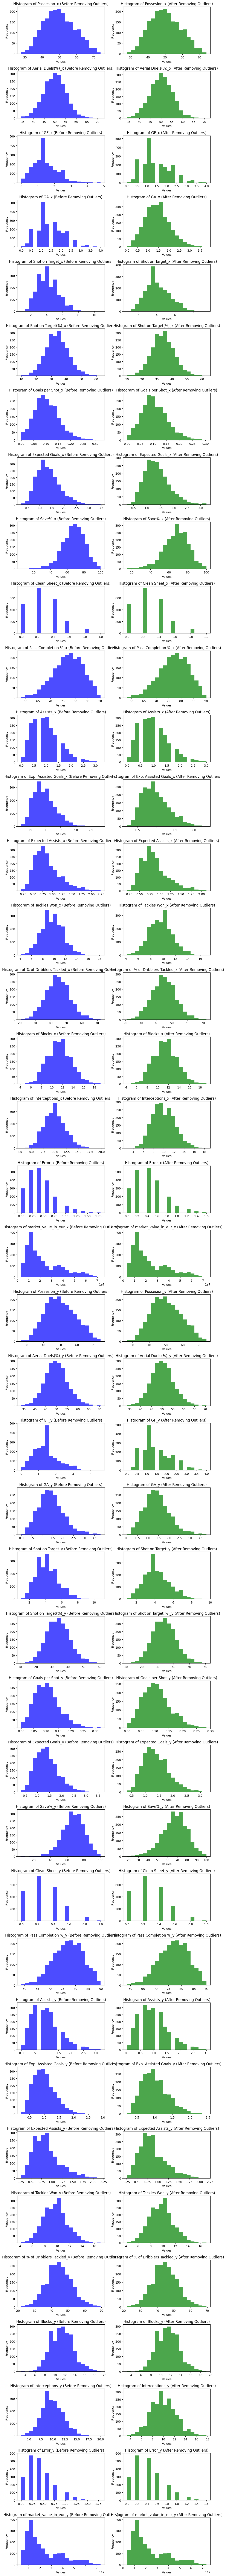

In [676]:
# 데이터프레임에서 이상치 제거 전/후 히스토그램 그리기 : threshold 4
plot_histogram_with_outliers(merged_df[selected_col_for_remove], 4)

In [677]:
remove_outliers(merged_df[selected_col_for_remove], 5)

Possesion_x  Aerial Duels(%)_x  GF_x  GA_x  Shot on Target_x  \
0            55.2              51.16   2.0   1.8               6.4   
1            59.2              49.34   2.4   1.4               6.8   
2            62.4              49.76   2.8   0.8               5.4   
3            60.4              51.24   2.8   0.8               4.4   
4            60.2              51.46   2.6   1.0               4.2   
...           ...                ...   ...   ...               ...   
2105         63.4              54.90   1.2   1.6               6.8   
2106         60.2              54.90   1.2   1.2               6.6   
2107         61.8              57.54   1.0   1.4               5.2   
2108         65.2              55.94   2.0   1.4               4.4   
2109         65.8              55.86   2.2   1.4               5.8   

      Shot on Target(%)_x  Goals per Shot_x  Expected Goals_x  Save%_x  \
0                   42.70             0.120              1.48    62.20   
1                   47.16             0.164              1.54    67.20   
2                   47.40             0.248              1.20    71.66   
3                   43.16             0.268              1.38    85.00   
4                   38.70             0.240              1.50    80.00   
...                   ...               ...               ...      ...   
2105                35.36             0.062              1.42    71.68   
2106                35.62             0.048              2.00    68.34   
2107                34.60             0.042              1.72    70.00   
2108                34.64             0.096              1.48    79.34   
2109                37.48             0.104              1.64    67.34   

      Clean Sheet_x  ...  Pass Completion %_y  Assists_y  \
0               0.0  ...                75.60        1.6   
1               0.2  ...                65.84        1.6   
2               0.4  ...                77.28        1.2   
3               0.4  ...                82.88        1.0   
4               0.2  ...                76.66        0.6   
...             ...  ...                  ...        ...   
2105            0.0  ...                85.54        1.8   
2106            0.2  ...                76.42        1.4   
2107            0.4  ...                77.50        1.4   
2108            0.4  ...                70.26        0.4   
2109            0.2  ...                74.82        1.2   

      Exp. Assisted Goals_y  Expected Assists_y  Tackles Won_y  \
0                      0.94                0.92           12.4   
1                      0.70                0.70           12.4   
2                      1.02                1.00           13.0   
3                      0.86                1.00            9.2   
4                      0.98                0.74            9.6   
...                     ...                 ...            ...   
2105                   1.52                1.34           13.4   
2106                   1.02                0.84           11.2   
2107                   0.86                0.82           12.4   
2108                   1.22                0.68           14.6   
2109                   1.48                0.80           11.4   

      % of Dribblers Tackled_y  Blocks_y  Interceptions_y  Error_y  \
0                        48.92      11.0             11.0      0.6   
1                        57.42      10.8             16.0      0.2   
2                        48.82      12.4             10.0      0.4   
3                        54.10      10.6              8.6      0.4   
4                        45.72      12.4             13.4      0.2   
...                        ...       ...              ...      ...   
2105                     61.40      12.4              8.2      1.6   
2106                     47.76      13.0              7.8      0.6   
2107                     60.92      13.4              7.2      0.2   
2108                     56.82      13.0             12.2     

In [678]:
merged_df[selected_col_for_remove] = merged_df[selected_col_for_remove].apply(lambda x: remove_outliers(x, 4))

In [679]:
merged_df = merged_df.dropna()

In [680]:
merged_df

game_id  club_id_x  club_id_y     B365HW      B365D     B365AW  Table_x  \
0     3050217         11         29  69.444444  20.000000  13.333333        6   
1     3050227         11       1010  69.444444  19.607843  14.285714        5   
2     3050247         11       1003  65.359477  22.222222  15.384615        4   
3     3050267         11         31  25.641026  25.641026  51.282051        5   
4     3050277         11        543  60.240964  23.809524  19.047619        5   
...       ...        ...        ...        ...        ...        ...      ...   
2105  4095259       1237        148  40.000000  27.777778  38.461538        8   
2106  4095279       1237        543  60.606061  23.094688  20.000000        7   
2107  4095299       1237        873  58.823529  25.000000  21.052632        8   
2108  4095333       1237         29  54.644809  26.315789  23.809524        7   
2109  4095353       1237        703  55.555556  25.000000  25.000000        8   

      Table_y  manager_name_x  manager_name_y  ...  Pass Completion %_y  \
0          12              82              40  ...                75.60   
1           6              82              32  ...                65.84   
2          11              82              13  ...                77.28   
3           3              82              36  ...                82.88   
4          11              82              53  ...                76.66   
...       ...             ...             ...  ...                  ...   
2105        5              67               4  ...                85.54   
2106       11              67              25  ...                76.42   
2107       14              67              68  ...                77.50   
2108       15              67              73  ...                70.26   
2109       17              67              53  ...                74.82   

      Assists_y  Exp. Assisted Goals_y  Expected Assists_y  Tackles Won_y  \
0           1.6                   0.94                0.92           12.4   
1           1.6                   0.70                0.70           12.4   
2           1.2                   1.02                1.00           13.0   
3           1.0                   0.86                1.00            9.2   
4           0.6                   0.98                0.74            9.6   
...         ...                    ...                 ...            ...   
2105        1.8                   1.52                1.34           13.4   
2106        1.4                   1.02                0.84           11.2   
2107        1.4                   0.86                0.82           12.4   
2108        0.4                   1.22                0.68           14.6   
2109        1.2                   1.48                0.80           11.4   

      % of Dribblers Tackled_y  Blocks_y  Interceptions_y  Error_y  \
0                        48.92      11.0             11.0      0.6   
1                        57.42      10.8             16.0      0.2   
2                        48.82      12.4             10.0      0.4   
3                        54.10      10.6              8.6      0.4   
4                        45.72      12.4             13.4      0.2   
...                        ...       ...              ...      ...   
2105                     61.40      12.4              8.2      1.6   
2106                     47.76      13.0              7.8      0.6   
2107                     60.92      13.4              7.2      0.2   
2108                     56.82      13.0             12.2      0.0   
2109                     60.64      15.0              6.4      0.4   

      market_value_in_eur_y  
0              1.807857e+07  
1              7.131319e+06  
2              1.536264e+07  
3              4.690769e+07  
4              1.222143e+07  
...                     ...  
2105           3.259726e+07  
2106           1.558929e+07  
2107           1.991760e+07  
2108           1.766045e+07  
2109           1.717485e+07  

[2077

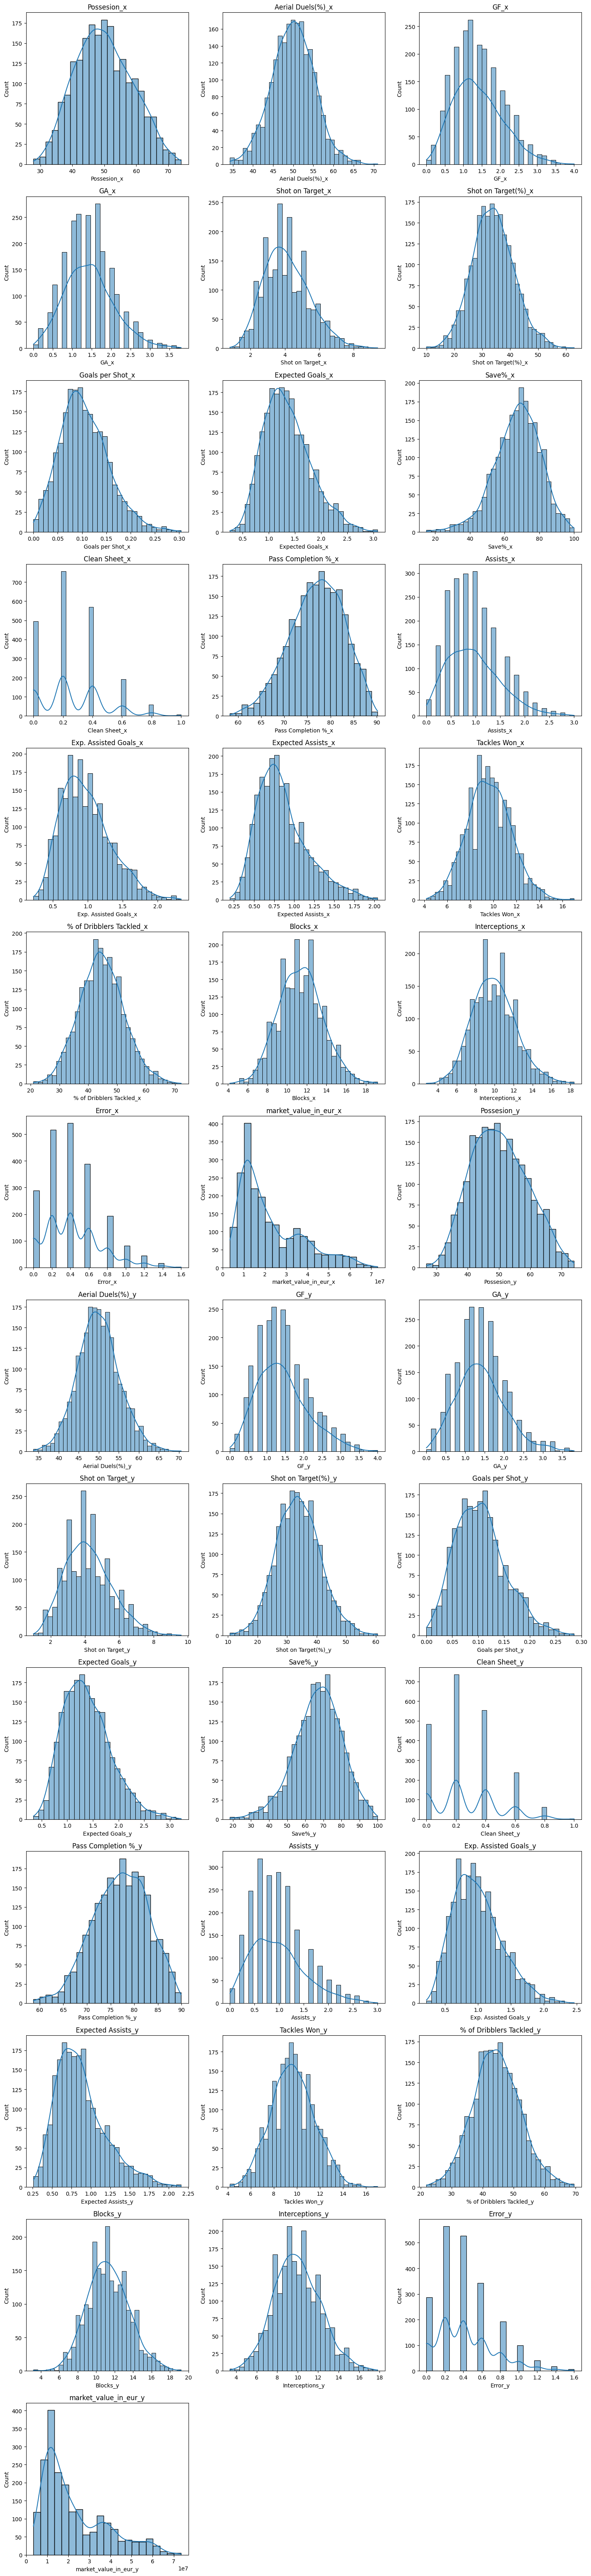

In [681]:
get_3_hist(merged_df, selected_col_for_remove)

In [682]:
# 표준화
# log 스케일링 할 컬럼

In [683]:
skewed_col = ['market_value_in_eur_x', 'market_value_in_eur_y']

In [684]:
merged_df[skewed_col] = np.log1p(merged_df[skewed_col])

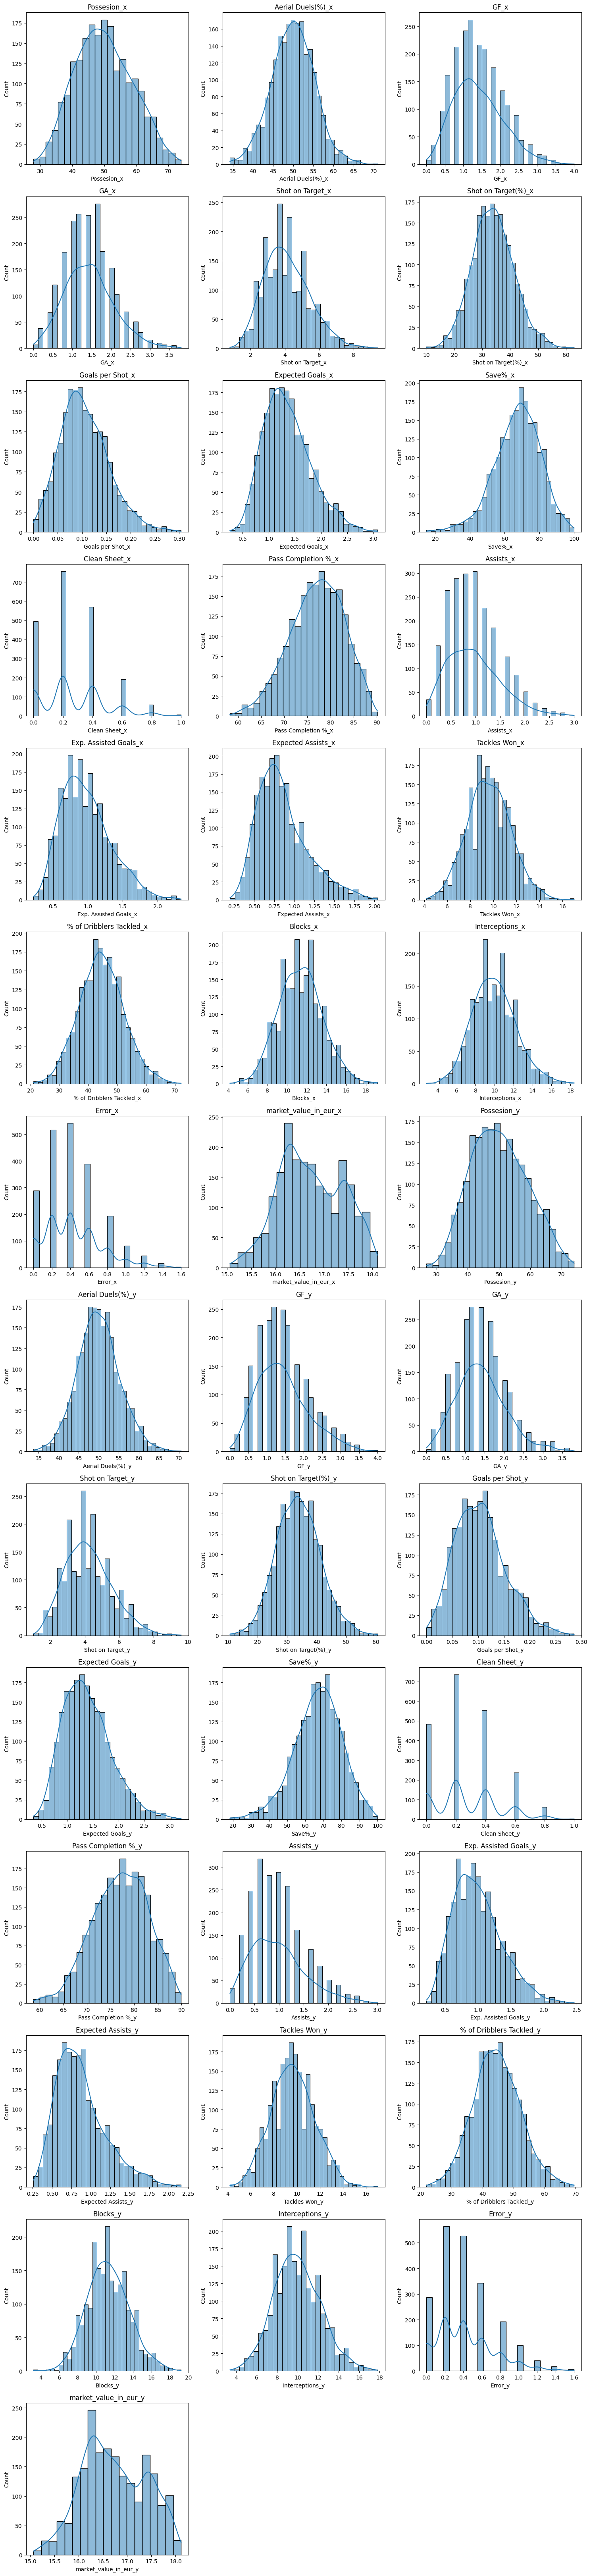

In [685]:
get_3_hist(merged_df, selected_col_for_remove)

In [686]:
# minmax scaling하기 
# scaling할 컬럼
col_to_minmax = ['TY_x', 'OY_x', 'TR_x', 'OR_x',
'Possesion_x', 'Aerial Duels(%)_x', 'GF_x', 'GA_x', 'Shot on Target_x',
'Shot on Target(%)_x', 'Goals per Shot_x', 'Expected Goals_x',
'Save%_x', 'Clean Sheet_x', 'Pass Completion %_x', 'Assists_x',
'Exp. Assisted Goals_x', 'Expected Assists_x', 'Tackles Won_x',
'% of Dribblers Tackled_x', 'Blocks_x', 'Interceptions_x', 'Error_x',
'market_value_in_eur_x', 'TY_y', 'OY_y', 'TR_y', 'OR_y', 'Possesion_y',
'Aerial Duels(%)_y', 'GF_y', 'GA_y', 'Shot on Target_y',
'Shot on Target(%)_y', 'Goals per Shot_y', 'Expected Goals_y',
'Save%_y', 'Clean Sheet_y', 'Pass Completion %_y', 'Assists_y',
'Exp. Assisted Goals_y', 'Expected Assists_y', 'Tackles Won_y',
'% of Dribblers Tackled_y', 'Blocks_y', 'Interceptions_y', 'Error_y',
'market_value_in_eur_y']

In [687]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

In [688]:
# 선택한 컬럼에 대해 스케일링 적용
merged_df[col_to_minmax] = scaler.fit_transform(merged_df[col_to_minmax])

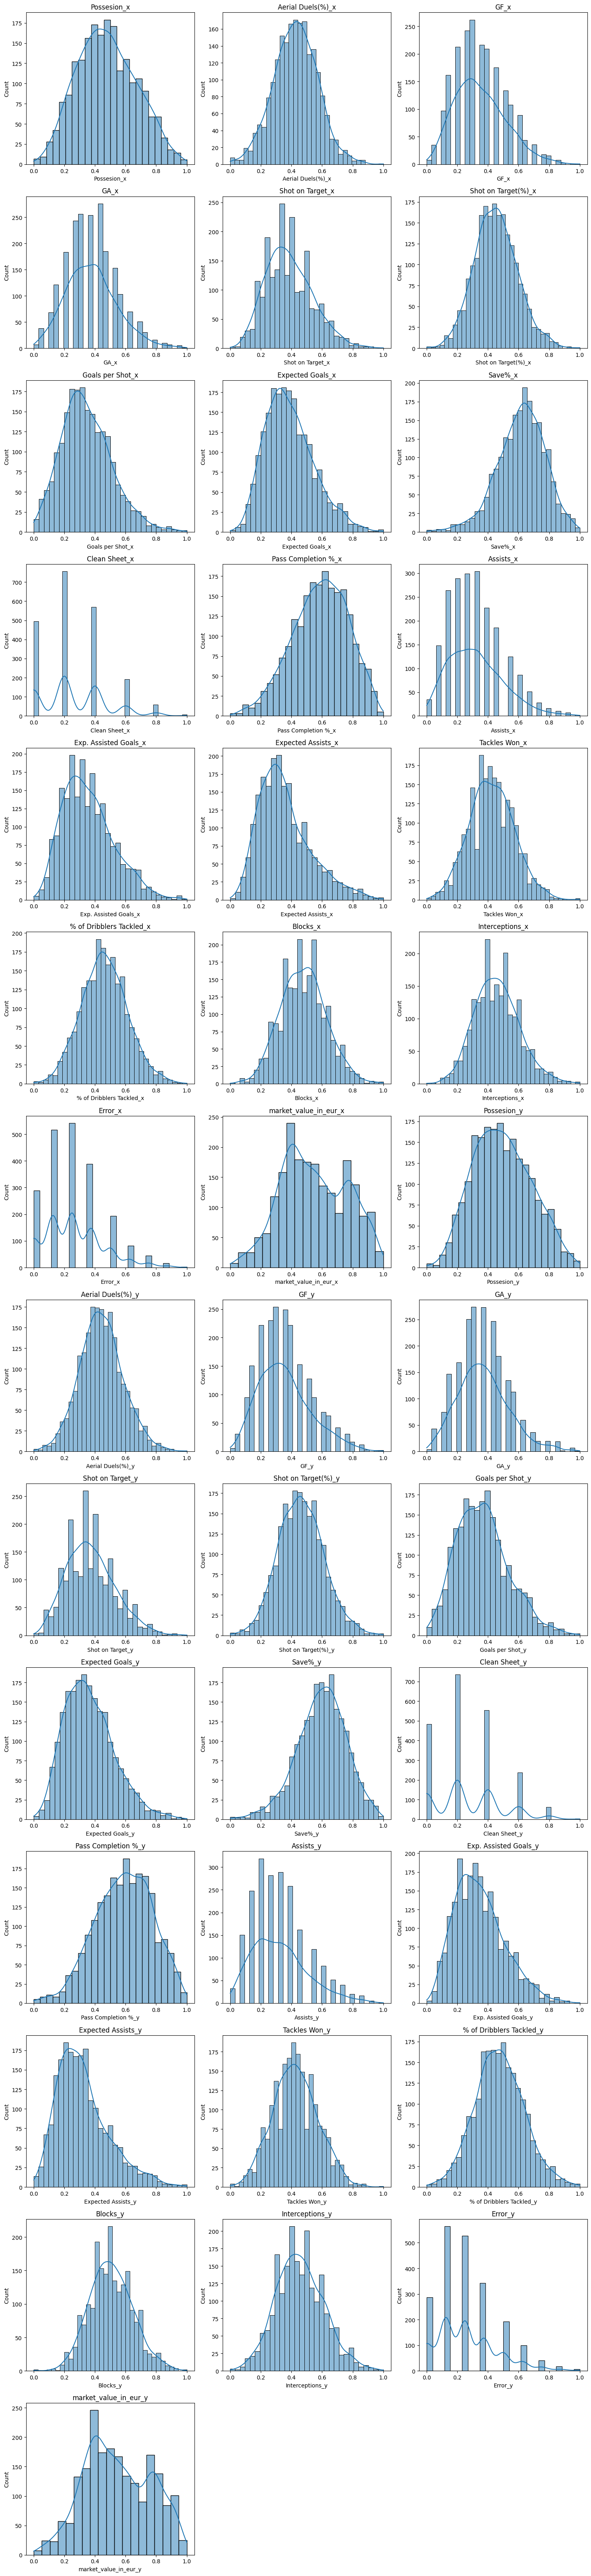

In [689]:
get_3_hist(merged_df, selected_col_for_remove)

In [690]:
merged_df.columns

Index(['game_id', 'club_id_x', 'club_id_y', 'B365HW', 'B365D', 'B365AW',
       'Table_x', 'Table_y', 'manager_name_x', 'manager_name_y',
       'home_team_id', 'Result', 'Referee', 'total_games_x', 'wins_x',
       'win_percentage_x', 'total_games_vs_opponent_x', 'wins_vs_opponent_x',
       'win_percentage_vs_opponent_x', 'TY_x', 'OY_x', 'TR_x', 'OR_x',
       'Possesion_x', 'Aerial Duels(%)_x', 'GF_x', 'GA_x', 'Shot on Target_x',
       'Shot on Target(%)_x', 'Goals per Shot_x', 'Expected Goals_x',
       'Save%_x', 'Clean Sheet_x', 'Pass Completion %_x', 'Assists_x',
       'Exp. Assisted Goals_x', 'Expected Assists_x', 'Tackles Won_x',
       '% of Dribblers Tackled_x', 'Blocks_x', 'Interceptions_x', 'Error_x',
       'market_value_in_eur_x', 'total_games_y', 'wins_y', 'win_percentage_y',
       'total_games_vs_opponent_y', 'wins_vs_opponent_y',
       'win_percentage_vs_opponent_y', 'TY_y', 'OY_y', 'TR_y', 'OR_y',
       'Possesion_y', 'Aerial Duels(%)_y', 'GF_y', 'GA_y', 'Shot o

In [691]:
corr = merged_df[['Result', 'club_id_x', 'club_id_y', 'B365HW', 'B365D', 'B365AW',
       'Table_x', 'Table_y', 'manager_name_x', 'manager_name_y',
       'home_team_id',  'Referee', 'total_games_x', 'wins_x',
       'win_percentage_x', 'total_games_vs_opponent_x', 'wins_vs_opponent_x',
       'win_percentage_vs_opponent_x', 'TY_x', 'OY_x', 'TR_x', 'OR_x',
       'Possesion_x', 'Aerial Duels(%)_x', 'GF_x', 'GA_x', 'Shot on Target_x',
       'Shot on Target(%)_x', 'Goals per Shot_x', 'Expected Goals_x',
       'Save%_x', 'Clean Sheet_x', 'Pass Completion %_x', 'Assists_x',
       'Exp. Assisted Goals_x', 'Expected Assists_x', 'Tackles Won_x',
       '% of Dribblers Tackled_x', 'Blocks_x', 'Interceptions_x', 'Error_x',
       'market_value_in_eur_x', 'total_games_y', 'wins_y', 'win_percentage_y',
       'total_games_vs_opponent_y', 'wins_vs_opponent_y',
       'win_percentage_vs_opponent_y', 'TY_y', 'OY_y', 'TR_y', 'OR_y',
       'Possesion_y', 'Aerial Duels(%)_y', 'GF_y', 'GA_y', 'Shot on Target_y',
       'Shot on Target(%)_y', 'Goals per Shot_y', 'Expected Goals_y',
       'Save%_y', 'Clean Sheet_y', 'Pass Completion %_y', 'Assists_y',
       'Exp. Assisted Goals_y', 'Expected Assists_y', 'Tackles Won_y',
       '% of Dribblers Tackled_y', 'Blocks_y', 'Interceptions_y', 'Error_y',
       'market_value_in_eur_y']].corr()

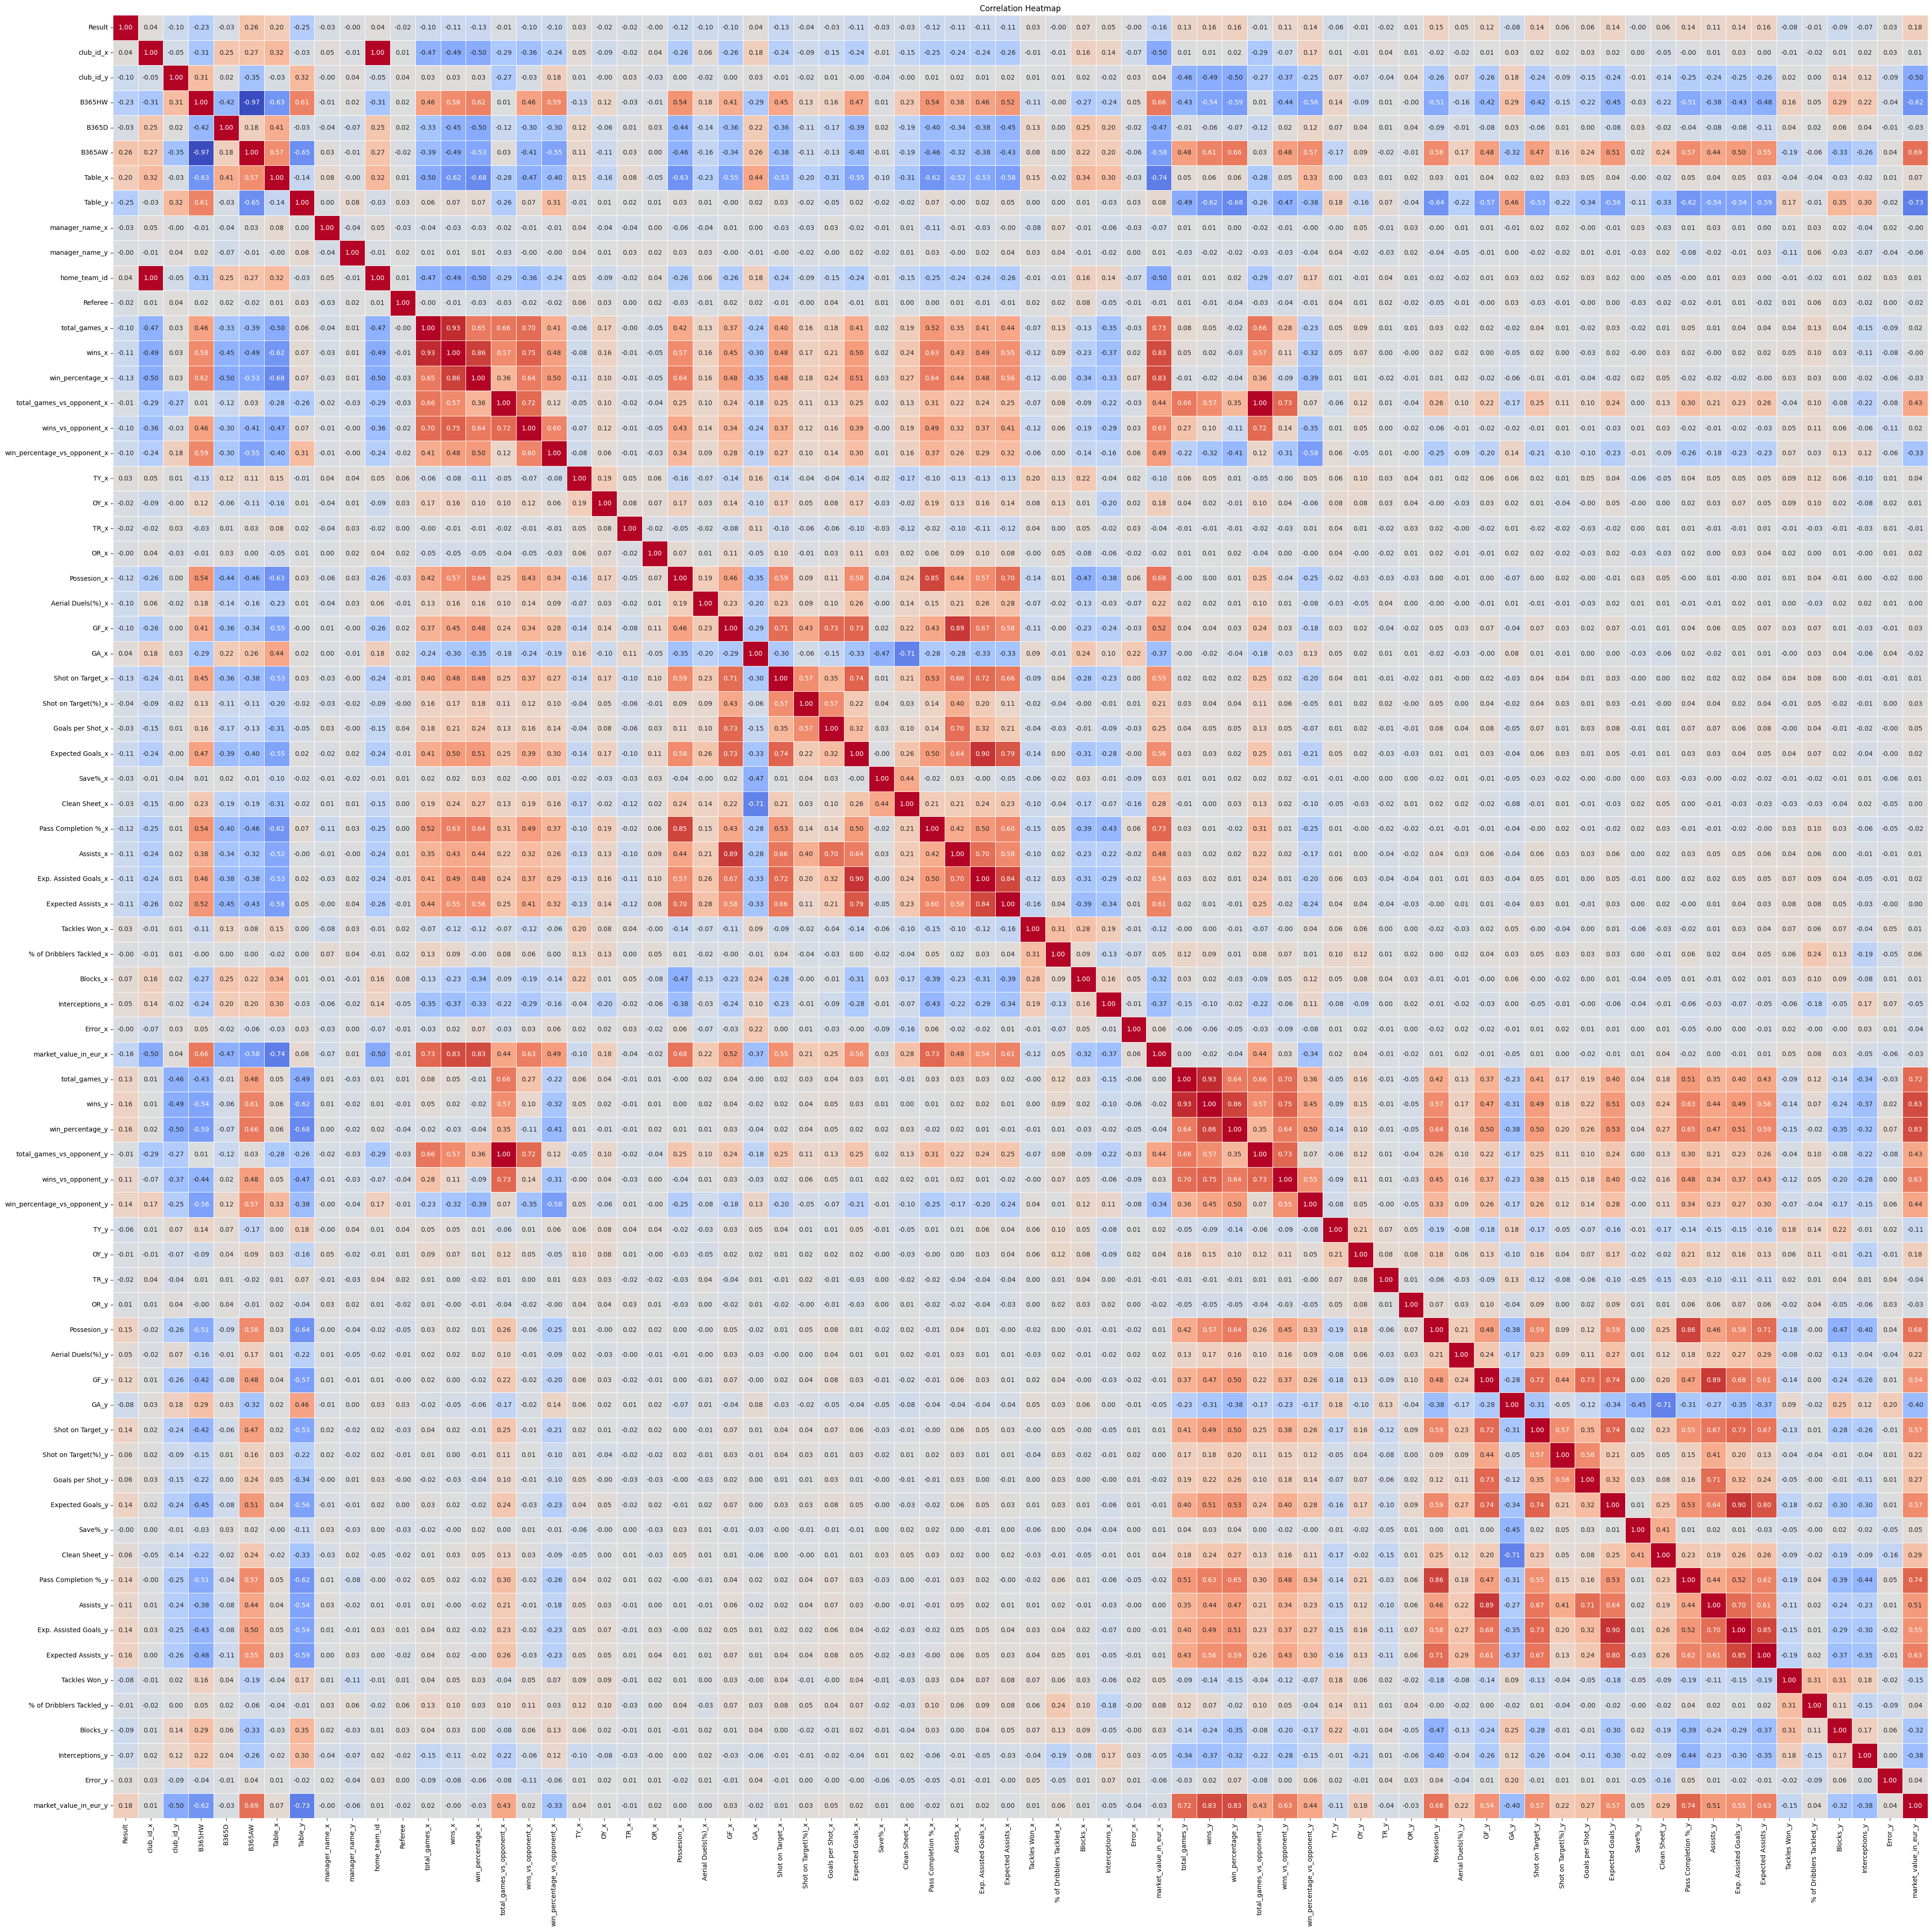

In [692]:
# 상관관계 그래프 그리기
plt.figure(figsize=(50, 50))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=False)
plt.title('Correlation Heatmap')
plt.show()

In [693]:
merged_df.columns

Index(['game_id', 'club_id_x', 'club_id_y', 'B365HW', 'B365D', 'B365AW',
       'Table_x', 'Table_y', 'manager_name_x', 'manager_name_y',
       'home_team_id', 'Result', 'Referee', 'total_games_x', 'wins_x',
       'win_percentage_x', 'total_games_vs_opponent_x', 'wins_vs_opponent_x',
       'win_percentage_vs_opponent_x', 'TY_x', 'OY_x', 'TR_x', 'OR_x',
       'Possesion_x', 'Aerial Duels(%)_x', 'GF_x', 'GA_x', 'Shot on Target_x',
       'Shot on Target(%)_x', 'Goals per Shot_x', 'Expected Goals_x',
       'Save%_x', 'Clean Sheet_x', 'Pass Completion %_x', 'Assists_x',
       'Exp. Assisted Goals_x', 'Expected Assists_x', 'Tackles Won_x',
       '% of Dribblers Tackled_x', 'Blocks_x', 'Interceptions_x', 'Error_x',
       'market_value_in_eur_x', 'total_games_y', 'wins_y', 'win_percentage_y',
       'total_games_vs_opponent_y', 'wins_vs_opponent_y',
       'win_percentage_vs_opponent_y', 'TY_y', 'OY_y', 'TR_y', 'OR_y',
       'Possesion_y', 'Aerial Duels(%)_y', 'GF_y', 'GA_y', 'Shot o

In [694]:
independent_variable =['club_id_x', 'club_id_y', 'B365HW', 'B365D', 'B365AW',
       'Table_x', 'Table_y', 'manager_name_x', 'manager_name_y',
       'home_team_id', 'Referee', 'total_games_x', 'wins_x',
       'win_percentage_x', 'total_games_vs_opponent_x', 'wins_vs_opponent_x',
       'win_percentage_vs_opponent_x', 'TY_x', 'OY_x', 'TR_x', 'OR_x',
       'Possesion_x', 'Aerial Duels(%)_x', 'GF_x', 'GA_x', 'Shot on Target_x',
       'Shot on Target(%)_x', 'Goals per Shot_x', 'Expected Goals_x',
       'Save%_x', 'Clean Sheet_x', 'Pass Completion %_x', 'Assists_x',
       'Exp. Assisted Goals_x', 'Expected Assists_x', 'Tackles Won_x',
       '% of Dribblers Tackled_x', 'Blocks_x', 'Interceptions_x', 'Error_x',
       'market_value_in_eur_x', 'total_games_y', 'wins_y', 'win_percentage_y',
       'total_games_vs_opponent_y', 'wins_vs_opponent_y',
       'win_percentage_vs_opponent_y', 'TY_y', 'OY_y', 'TR_y', 'OR_y',
       'Possesion_y', 'Aerial Duels(%)_y', 'GF_y', 'GA_y', 'Shot on Target_y',
       'Shot on Target(%)_y', 'Goals per Shot_y', 'Expected Goals_y',
       'Save%_y', 'Clean Sheet_y', 'Pass Completion %_y', 'Assists_y',
       'Exp. Assisted Goals_y', 'Expected Assists_y', 'Tackles Won_y',
       '% of Dribblers Tackled_y', 'Blocks_y', 'Interceptions_y', 'Error_y',
       'market_value_in_eur_y']

In [695]:
# 데이터셋 train과 test로 나누기
X = merged_df[independent_variable]
y = merged_df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [696]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5889423076923077
F1 Score: 0.5350728212798004


In [697]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5913461538461539
F1 Score: 0.5389462010073964


In [698]:
rf_model = RandomForestClassifier(n_estimators=205, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5961538461538461
F1 Score: 0.5434713350722037


In [699]:
rf_model = RandomForestClassifier(n_estimators=205, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5841346153846154
F1 Score: 0.5151117792241084


In [700]:
rf_model = RandomForestClassifier(
    n_estimators=205, 
    max_depth=10, 
    random_state=42,
    min_samples_leaf=20,
    min_samples_split=10)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5865384615384616
F1 Score: 0.512004662004662


In [701]:
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=None, learning_rate=None, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5649038461538461
F1 Score: 0.5389362869899201


In [702]:
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=1, learning_rate=None, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.5841346153846154
F1 Score: 0.5275216529855322


In [703]:
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=1, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6129807692307693
F1 Score: 0.5498129145219759


In [723]:
xgb_model = xgb.XGBClassifier(n_estimators=100, 
                              max_depth=1,
                              min_child_weight=0.2, 
                              learning_rate=0.11, 
                              random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6153846153846154
F1 Score: 0.5487711894041638


In [754]:
xgb_model = xgb.XGBClassifier(n_estimators=100, 
                              max_depth=1,
                              min_child_weight=0.2,
                              learning_rate=0.09, 
                              random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6129807692307693
F1 Score: 0.5498129145219759
